# Chapter 12: Custom Models and Training in Tensorflow

## Quick Tour of Tensorflow

For Chapter 10 and 11, only Tensorflow's High Level API has been used. The High-Level API allowed us to build various network architectures, such as Wide and Deep nets, regression and classification nets, as well as implement techniques such as Batch Normalization, MCDropout and learning-rate schedules. **Matter of fact, 95% of the time, tf.keras and tf.data will be used**. But **for the remaining 5%, the lower level Python API can be used**. This can be used to have extra control to write custom loss functions, custom metrics, layers, models, layers.initializers , weight constraints and even fully control the training loop itself, in which special transformations are applied to gradients or to even use multiple optimizers for different parts of the network.

TensorFlow is a powerful library for numerical computation, particularly well suited and fine-tuned for large-scale Machine Learning. 

Here is what Tensorflow has to offer:

Tensorflow's core is very similar to NumPy, in addition it has GPU support. Tensorflow also supports distributed computing, meaning it can work across multiple devices and servers. It also has the ability to export Computation graphs to a portable format. This allows a Tensorflow model in one environment(using  Python on Linux) and run it in another environment. (e.g On an Android device that uses Java or Kotlin). It can also implement auto-differentation,autodiff and other optimizers and loss  functions.

#### Tensorflow Operations.

Tensorflow operations, are executed in efficient C++ code. Many operations have multiple implementations called kernels: each kernel is dedicated to a specific device type, such as CPUs, GPUs, or even TPUs (tensor processing units). Tensorflow offers the following operations for a variety of tasks.

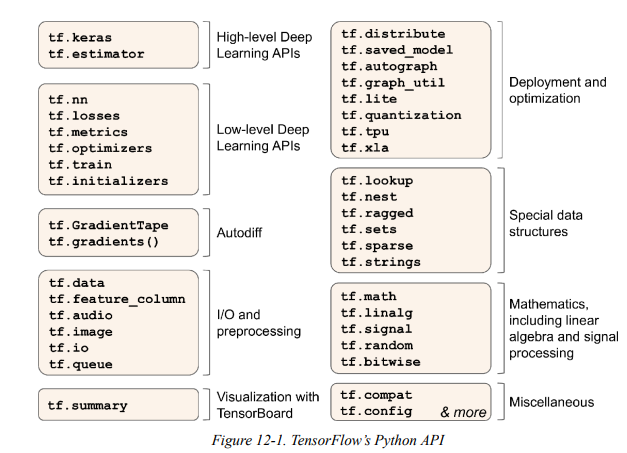


### Tensorflow's Architecture

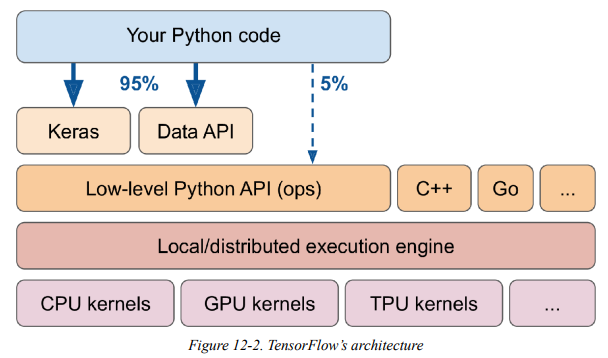

## Using Tensorflow like NumPy

Tensorflow's API revolves around **tensors**. Tensors are just like n-dimensional NumPy arrays(ndarrays) , in addition, tensors can hold scalar values. These tensors the flow from operartion to operation,hence the name Tensorflow. Recall operations are like tf.math, tf.data, tf.io. These are task dependant.

Tensors therefore become important, in the creation of custom cost functions, custom metrics and custom layers.

### Tensors and Operations

Tensors are created using `tf.constant`. Just like a NumPy array, tensorflow tensors have a shape and a data type. In addition to this,one can do various operations on these tensors such as scalar addition, squaring andfinding the transpose just to name a few. Furthermore, indexing of tensors works exactly like when using NumPy.

The following code will confirm this

In [3]:
# Create a tensor of 2 rows and 3 columns
import tensorflow as tf

#1. Its a 2 dimensional array, therefore, we need two square brackets

t = tf.constant([[1.0, 2.0, 3.0],[4.0, 5.0, 6.0]])
print(t)

tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]], shape=(2, 3), dtype=float32)


In [4]:
# Create a tensorflow that holds a constant value
t_const = tf.constant(42)
print(t_const)

tf.Tensor(42, shape=(), dtype=int32)


From the above, we can see that the shape is printed out and the data type is shown. However, the shape and dtype attributes can be used to check the shape and data type of a tensor.

In [5]:
# Checking the shape and data type.
print(t.shape, t.dtype)

(2, 3) <dtype: 'float32'>


In [6]:
# Lets create another tensor
t_2 = tf.constant([[1,2,3],[4,5,6],[7,8,9]])
print(t_2)
print(t_2.shape, t_2.dtype)

tf.Tensor(
[[1 2 3]
 [4 5 6]
 [7 8 9]], shape=(3, 3), dtype=int32)
(3, 3) <dtype: 'int32'>


In [9]:
# Do some operations

#1. Square the tensor

print(tf.square(t))
print(tf.square(t_2))

tf.Tensor(
[[ 1.  4.  9.]
 [16. 25. 36.]], shape=(2, 3), dtype=float32)
tf.Tensor(
[[ 1  4  9]
 [16 25 36]
 [49 64 81]], shape=(3, 3), dtype=int32)


In [13]:
#Check the max

print(tf.reduce_max(t))

tf.Tensor(6.0, shape=(), dtype=float32)


In [21]:
#Check indexing
print(t[1,:])
print(t_2[2,:])

tf.Tensor([4. 5. 6.], shape=(3,), dtype=float32)
tf.Tensor([7 8 9], shape=(3,), dtype=int32)


In [23]:
#Check transpose

print(tf.transpose(t))
print(tf.transpose(t_2))

tf.Tensor(
[[1. 4.]
 [2. 5.]
 [3. 6.]], shape=(3, 2), dtype=float32)
tf.Tensor(
[[1 4 7]
 [2 5 8]
 [3 6 9]], shape=(3, 3), dtype=int32)


###### Basic Math Operations

`tf.add()`,`tf.multiply()`, `tf.square()`, `tf.exp()`, `tf.sqrt()`

These are similar to the operations in NumPy.

Further operations include:

`tf.reshape()`,`tf.squeeze()`, `tf.tile()`

**Note: Many functions and classes have aliases. For example, tf.add() and tf.math.add()
are the same function. This allows TensorFlow to have concise names for the most
common operations while preserving well-organized packages.**

#### Keras Low-Level API

The Keras API has its own low-level API, located in keras.backend. It
includes functions like square(), exp(), and sqrt(). In tf.keras, these
functions generally just call the corresponding TensorFlow operations.
If you want to write code that will be portable to other Keras
implementations, you should use these Keras functions. However, they
only cover a subset of all functions available in TensorFlow, so in this
book we will use the TensorFlow operations directly. 

### Tensors and NumPy

Tensors play nice with NumPy: You can create a tensor from NumPy array, and create an array from a Tensorflow tensor. You can even apply Tensorflow operations to NumPy arrays and NumPy operations to tensors.

**Honestly, this is cool. I am thoroughly impressed**

In [26]:
# Create a numpy array and then convert to a Tensorflow tensor
import numpy as np

a = np.array([2.0, 3.0, 4.0, 6.0])
print(a)
print(tf.constant(a))

[2. 3. 4. 6.]
tf.Tensor([2. 3. 4. 6.], shape=(4,), dtype=float64)


In [28]:
#Convert convert tf tensor to numpy array
print(t.numpy())
print(np.array(t))

[[1. 2. 3.]
 [4. 5. 6.]]
[[1. 2. 3.]
 [4. 5. 6.]]


#### Warning

Notice that **NumPy uses 64-bit precision by default**, while **TensorFlow uses 32-bit**. This
is because 32-bit precision is generally more than enough for neural networks, plus it
runs faster and uses less RAM. So when you create a tensor from a NumPy array, make
sure to set dtype=tf.float32

### Type Conversions

Type conversions is when you convert the data type of a tensor to a suitable one. Tensorflow does not automatically do type conversion, and as such you may be met Tracebacks. For example you cannot add a float tensor with an integer tensor, youcannot even add a 32-bit float and a 64-bit float.

This is done for a good cause, because type conversion can hurt performance and also they can go unnoticed.

As a solution to this small issue, one can use tf.cast, to convert a data type of a tensor to a suitable type.

Check out the code below:



In [4]:
# Showing how incompatatible tensors cannot be added
import tensorflow as tf

t_float = tf.constant([1.0,2.0,3.0,4.0,6.0]) #Flaot tensor

t_int = tf.constant([1,2,3,4,5]) # integer float

print(t_float + t_int)

InvalidArgumentError: cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a int32 tensor [Op:AddV2]

In [6]:
# The above gives us the TraceBack we expected.
# Now we will use tf.cast to solve the problem

t_f2i = tf.cast(t_float, tf.int32)
print(t_int + t_f2i)

tf.Tensor([ 2  4  6  8 11], shape=(5,), dtype=int32)


**tf.cast is really dope man.**

### Variables

Tensorflow tensors are immutable,so we cannot modify them. So with regard to neural nets, this means we cannot use regular tensors to implement weights in a neural network, since they have to be tweaked using backpropagation. In addition,  other parameters may also need to change. So to combat this, we gotta use `tf.Variables`

A `tf.Variable` acts much like a `tf.Tensor`: you can perform the same operations with it, it plays nicely with NumPy as well, and it is just as picky with types. In addition to this, they can be modified by using the `assign()` method, where the parameters are the indexes you want to update. Furthermore, you can add or even decrement tf.Variable elements by using the `assign_add()` or `assign_sub()` methods. You can also modify individual cells (or slices), by using the cell’s (or slice’s) `assign()` method (direct item assignment will not work) or by using the `scatter_update()` or `scatter_nd_update()` methods


**NOTE:**

In practice you will rarely have to create variables manually, since Keras provides an
add_weight() method that will take care of it for you, as we will see. Moreover, model
parameters will generally be updated directly by the optimizers, so you will rarely need
to update variables manually.

In [3]:
import tensorflow as tf

v = tf.Variable([[1.0, 2.0, 3.0, 4.0 ], [5.0, 6.0 , 7.0 ,8.0]])
print(v)

<tf.Variable 'Variable:0' shape=(2, 4) dtype=float32, numpy=
array([[1., 2., 3., 4.],
       [5., 6., 7., 8.]], dtype=float32)>


In [4]:
# Now perform an operation

print(v.assign(2*v)) # Multiply the entries by 2

<tf.Variable 'UnreadVariable' shape=(2, 4) dtype=float32, numpy=
array([[ 2.,  4.,  6.,  8.],
       [10., 12., 14., 16.]], dtype=float32)>


In [5]:
print(v.scatter_nd_update(indices=[[0, 0], [1, 2]], updates=[100., 200.]))
# This will update the entry in row 1 and column 1 with 100.0 and the entry in row 2 and column 3 with 200.0

<tf.Variable 'UnreadVariable' shape=(2, 4) dtype=float32, numpy=
array([[100.,   4.,   6.,   8.],
       [ 10.,  12., 200.,  16.]], dtype=float32)>


In [6]:
# Perform addition
v_2 = v + v
print(v_2)

tf.Tensor(
[[200.   8.  12.  16.]
 [ 20.  24. 400.  32.]], shape=(2, 4), dtype=float32)


### Other Data Structures


Tensorflow has other data structures. And I'll just copy and paste from the textbook. 

**Sparse tensors (`tf.SparseTensor`)**

Efficiently represent tensors containing mostly zeros. The tf.sparse
package contains operations for sparse tensors.

**Tensor arrays (`tf.TensorArray`)**

Are lists of tensors. They have a fixed size by default but can optionally
be made dynamic. All tensors they contain must have the same shape
and data type.

**Ragged tensors (`tf.RaggedTensor`)**

Represent static lists of lists of tensors, where every tensor has the same
shape and data type. The tf.ragged package contains operations for
ragged tensors.

**Sets**

Are represented as regular tensors (or sparse tensors). For example,
tf.constant([[1, 2], [3, 4]]) represents the two sets {1, 2} and
{3, 4}. More generally, each set is represented by a vector in the
tensor’s last axis. You can manipulate sets using operations from the
tf.sets package.

**Strnig Tensors and Queues are alosavailable but are not covered in this notebook.**





## Customizing Models and Training Algorithms

### Creating Custom Loss Functions

Creating a custom loss function is easy to implement. You create a function that takes the labels and predictions as arguments.
This can be seen in the code below, where the Huber Loss Function is created.

**The Huber loss is used for regression problems.**
**Try Implement this for Kaggle compies**

In [ ]:
def huber_fn(y_true, y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error)<1
    squared_loss = tf.sqaure(error)/2.0
    linear_loss = tf.abs(error) - 0.5
    
    return tf.where(is_small_error, squared_loss, linear_loss)

The loss function can then be used as normal as when you compile a model

In [ ]:
model.compile(loss=huber_fn, optimizer="nadam",metrics=["mae"])

For each batch during training, Keras will call the `huber_fn()` function to compute the loss and use it to perform a Gradient
Descent step. Moreover, it will keep track of the total loss since the beginning of the epoch, and it will display the mean loss

### Saving and Loading Models That Contain Custom Components

You can save a model with custom objects.All you have to do, is when loading the model, there is a `custom_objects` argument.This argument takes a dictionary, where the key is the name of the custom object and value is the custom_object itself. So basically, a dictionary that maps the names to the objects. Keras saves the names of the objects

The code below will illustrate:

In [ ]:
from tf.keras.model import load_model

#1. Save the model

model.save("name_of_model.h5")

#2. Load the model

model = load_model("name_of_model.h5", custom_objects = {"huber_fn": huber_fn})

The `huber_fn` results a small error if the error is between -1 and 1. What you  want a different range. This can be done by creating a function that creates a custom loss function, so that the error range is  dynamically found depending on the user.

In [ ]:
def create_huber(threshold = 1.0):
    def huber_fn(y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error)<threshold
        squared_loss = tf.sqaure(error)/2.0
        linear_loss =  threshold * tf.abs(error) - threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    return huber_fn

In [ ]:
model.compile(loss=create_huber(2.0), optimizer="nadam")

This way however will not load the threshold when you load the model. You will have to enter the threshold in the dictionary when loading the moddel.

In [ ]:
model = keras.models.load_model("my_model_with_a_custom_loss_threshold_2.h5",custom_objects={"huber_fn":create_huber(2.0)})

There is another way to load models with configurable custom objects and not re-enter any arguments. This invloves subclassing the tf.keras.losses.Loss class and then implementing its `get_config()` method. This described in further detail in the textbook but the code is found below:

In [ ]:
class HuberLoss(keras.losses.Loss):
    def __init__(self, threshold=1.0, **kwargs):
        self.threshold = threshold
        super().__init__(**kwargs)
    def call(self, y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < self.threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = self.threshold * tf.abs(error) - self.threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

### Custom Activation Functions, Initializers, Regularizers, and Constraints

Creating custom activation functions, initializers, Regularizers and Constraints is basically the same as what was done for custom loss functions.

The main take away is that: You create a function that will implement was you want and then call that function in the layer where the activation function, regularizer,constraint or initializer will be used.

If there are any configurations that need to be done, then you will have to subclass the appropriate class. 

**Activation Functions** create a subclass using the following superclass: `tf.keras.activations.Activation`

**Initializers** create a subclass using the following superclass: `tf.keras.initializers.Initializer` 

**Regularizers** create a subclass using the following superclass: `tf.keras.regularilzers.Regularizer`

**Constraints** create a subclass using the following superclass: `tf.keras.constraints.Constraints`

The subclassing helps us when wewant to save and load the model, and there are custom objects with configurations.

Check out the code below:


In [ ]:
# Create a custom activation function:

def my_softplus(z):
    return tf.math.log(tf.exp(z)+1.0)
    # return value is just tf.nn.softplus(z)
    
# Create a custom initializer:

def my_glorot_initializer(shape, dtype=tf.float32):
    stddev = tf.sqrt(2. / (shape[0] + shape[1]))
    return tf.random.normal(shape, stddev=stddev, dtype=dtype)

# Create a custom regularizer

def my_l1_regularizer(weights):
    return tf.reduce_sum(tf.abs(0.01 * weights))

# Create a custom constraint ensures weights are all positive

def my_positive_weights(weights): # return value is just tf.nn.relu(weights)
    return tf.where(weights < 0., tf.zeros_like(weights), weights)

The above functions can then be called, when defining the model layers

In [ ]:
layer = keras.layers.Dense(1, activation=my_softplus,
                           kernel_initializer=my_glorot_initializer,
                           kernel_regularizer=my_l1_regularizer,
                           kernel_constraint=my_positive_weights)

The code below shows the `MyL1Regularizer` is a subclass of the `Regularizer` class, and what was implemented was the `__call__()` method, which returns the same output as the `my_l1_regularizer` function above.

The factor is the hyperparameter that will be configured, so it defined as an argumentin theinitialization method, and then defined as an attribute within the same model.

Finally in the `get_config()`,is used to set up the dictionary, so that we can save and load the custom object at will.

**NOTE**

You must implement the `call()` method for **losses, layers
(including activation functions), and models**, or the `__call__()` method for
**regularizers, initializers, and constraints**

In [ ]:
class MyL1Regularizer(keras.regularizers.Regularizer):
    def __init__(self, factor):
        self.factor = factor
    def __call__(self, weights):
        return tf.reduce_sum(tf.abs(self.factor * weights))
    def get_config(self):
        return {"factor": self.factor}

### Custom Metrics

Losses and Metrics are not  the same thing conceptually. **Losses** a **used to train a model**, and they ared used by Gradient Descent to train a model. This means, they have to be differentiable, and their gradients should not be zero everywhere. In addition, it is **understandable if they are not interpretable by humans**. **Mertics** on the other hand **evaluate a model**. They are non-differentiable nad can have zero gradients everywhere. **They are also easily interpretable by humans.**

However, defining a custom metric function is exactly the same as defining a custom loss function.  The huber function canbe used as a metric, for a regression problem.

In [ ]:
model.compile(loss="mse", optimizer="nadam", metrics=[create_huber(2.0)])

**Note**: if you use the same function as the loss and a metric, you may be surprised to see different results. This is generally just due to floating point precision errors: even though the mathematical equations are equivalent, the operations are not run in the same order, which can lead to small differences. Moreover, when using sample weights, there's more than just precision errors:
* the loss since the start of the epoch is the mean of all batch losses seen so far. Each batch loss is the sum of the weighted instance losses divided by the _batch size_ (not the sum of weights, so the batch loss is _not_ the weighted mean of the losses).
* the metric since the start of the epoch is equal to the sum of weighted instance losses divided by sum of all weights seen so far. In other words, it is the weighted mean of all the instance losses. Not the same thing.

If you do the math, you will find that loss = metric * mean of sample weights (plus some floating point precision error).

#### Streaming Metrics

A streaming metric is a metric that is gradually updated bacth after batch. To create a streaming metric, one needs to create a  subclass of the `tf.keras.metrics.Metric` class. The code for doing this below,and is explained in depth in the textbook

In [ ]:
class HuberMetric(keras.metrics.Metric):
    def __init__(self, threshold=1.0, **kwargs):
        super().__init__(**kwargs) # handles base args (e.g., dtype)
        self.threshold = threshold
        self.huber_fn = create_huber(threshold)
        self.total = self.add_weight("total", initializer="zeros")
        self.count = self.add_weight("count", initializer="zeros")
    def update_state(self, y_true, y_pred, sample_weight=None):
        metric = self.huber_fn(y_true, y_pred)
        self.total.assign_add(tf.reduce_sum(metric))
        self.count.assign_add(tf.cast(tf.size(y_true), tf.float32))
    def result(self):
        return self.total / self.count
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

Lets do an example using the `tf.keras.metrics.Precision` class

**NOTE**

Precision is the number of true predictions divided by the number of positive predictions.

In [1]:
import tensorflow as tf

precision = tf.keras.metrics.Precision()
# Consider when training we pass the labels and predictions.
#There are 5 positive predictions and 4 true predictions. Thus the precision is 80%
print(precision([0, 1, 1, 1, 0, 1, 0, 1], [1, 1, 0, 1, 0, 1, 0, 1]))

tf.Tensor(0.8, shape=(), dtype=float32)


In [2]:
#There are 3 positive predictions and 0 true predictions.
# The overall precision though is 50%. First batch we 4 TP and 5 PP and Second Batch 0 TP and 3PP.
#Therefore precision = (4 + 0)/(5+3) = 0.5
print(precision([0, 1, 0, 0, 1, 0, 1, 1], [1, 0, 1, 1, 0, 0, 0, 0]))

tf.Tensor(0.5, shape=(), dtype=float32)


In [4]:
#This method confirms the calculation.This precision then will be updated gradually afterevery batch, therefore is a streaming metric
print(precision.result())

tf.Tensor(0.5, shape=(), dtype=float32)


In [5]:
print(precision.variables)

[<tf.Variable 'true_positives:0' shape=(1,) dtype=float32, numpy=array([4.], dtype=float32)>, <tf.Variable 'false_positives:0' shape=(1,) dtype=float32, numpy=array([4.], dtype=float32)>]


In [6]:
print(precision([0, 1, 1, 1, 0, 1, 0, 1], [0, 1, 1, 1, 0, 1, 0, 1]))

tf.Tensor(0.6923077, shape=(), dtype=float32)


### Custom Layers

Custom layers are built when we have a very repititive netowrk architecture, with repeating identical blocks of layers. Thus each block of layers can be treated as a single custom layer. To further explain, suppose a model is a sequence of layers following the order A,B,C, A,B,C,A,B,C,A,B,C. The sequence ABC can be treated as a block of layers, and we can make D a custom layer that contains this block. Therefore the model sequence becomes D,D,D. We can also build custom layers when we want an exotic layer that is not available in Keras.

To build layers with weight,i.e Stateful Layers, we have to create a subclass of the `tf.keras.layers.Layer` superclass.
The code below illustrates this and is explained in depth in the book.

In [ ]:
class MyDense(keras.layers.Layer):
    def __init__(self, units, activation=None, **kwargs):
        super().__init__(**kwargs)
        self.units = units
        self.activation = keras.activations.get(activation)

    def build(self, batch_input_shape):
        self.kernel = self.add_weight(
            name="kernel", shape=[batch_input_shape[-1], self.units],
            initializer="glorot_normal")
        self.bias = self.add_weight(
            name="bias", shape=[self.units], initializer="zeros")
        super().build(batch_input_shape) # must be at the end

    def call(self, X):
        return self.activation(X @ self.kernel + self.bias)

    def compute_output_shape(self, batch_input_shape):
        return tf.TensorShape(batch_input_shape.as_list()[:-1] + [self.units])

    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "units": self.units,
                "activation": keras.activations.serialize(self.activation)}

#### Code Explaination:

The class has five methods. The initializer(constructor), the build method, the call method, the compute_output_shape method and the get_config method

1. **Initializer**
   The initializer takes the layer hyperparameters as arguments(so units and activation). It also takes `**kwargs`(key words argument). The kwargs take care of the standard arguments such as input_shape,trainable and name etc. It then saves the hyperparameters as attributes. In  addition it converts the activation argument to the appropriate activation function, using the `tf.keras.activations.get()` function, so that  it can accept standard strings like "selu" and "relu".
   
   

2. **Build Method**
   This function's role is to create the layer's variables by calling the add-Weight method.The  build method is called the first time the layer is used, thereafter Keras will know the shape of  the layers inputs and will pass it into the method. This is necessary to create the weights. The number of neurons in the previous layers, need to be known in order to create the weights matrix. This corresponds to the size of the last dimension of the inputs. The build method then calls the parent's build method(ONLY AT THE END) to tell Keras that the layer is built.(sets self.built=True)
   

3. **Call Method**
    This method performs the desired  operations. So for a Dense Layer, it performs matrix multiplication of inputs X and the layers kernel(Connection Weights Matrix), then we add a bias vector and finally apply the activation function.
    

4. **Compute_Output_Shape Method**
    The compute_output_shape() method simply returns the shape
of this layer’s outputs. In this case, it is the same shape as the
inputs, except the last dimension is replaced with the number of
8
9
neurons in the layer. Note that in tf.keras, shapes are instances of
the tf.TensorShape class, which you can convert to Python lists
using as_list().


5. **get_config Method**

    The get_config() method is just like in the previous custom
classes. Note that we save the activation function’s full
configuration by calling keras.activations.serialize().


   






**NOTE**

You can generally omit the compute_output_shape() method, as tf.keras
automatically infers the output shape, except when the layer is dynamic (as we will see
shortly). In other Keras implementations, this method is either required or its default
implementation assumes the output shape is the same as the input shape.


### How to deal with exotic layers

**What to do when creating a layer with multiple inputs(e.g Concatenate)**

1. The argument to the call()method should be a tuple. A tuple containing all the inputs.

2. The argument to  the compute_output_shape() method should be a tuple containing each input's batch shape.

**What do do when creating a layer with multiple outputs**

1. The call method should return a list of all the outputs.

2. The compute_output_shape() method should return a list of batch output shapes.


In [ ]:
#Layer takes 2 inputs and returns 3 outputs

class MyMultiLayer(keras.layers.Layer):
    def call(self, X):
        X1, X2 = X
        print("X1.shape: ", X1.shape ," X2.shape: ", X2.shape) # Debugging of custom layer
        return X1 + X2, X1 * X2

    def compute_output_shape(self, batch_input_shape):
        batch_input_shape1, batch_input_shape2 = batch_input_shape
        return [batch_input_shape1, batch_input_shape2]

You may want to create layers that act differently during training and testing.For example: BatchNormalization or Dropout. This is done by adding a training argment in the `call()` method and then you use this argument to decide what do to do.

Consider the code below:

It is a layer that add Gaussian Noise during training(for regularization) and does nothing during testing.

**Note: Keras has a layer that does the same thing: keras.layers.GaussianNoise**

In [ ]:
class AddGaussianNoise(keras.layers.Layer):
    def __init__(self, stddev, **kwargs):
        super().__init__(**kwargs)
        self.stddev = stddev

    def call(self, X, training=None):
        if training:
            noise = tf.random.normal(tf.shape(X), stddev=self.stddev)
            return X + noise
        else:
            return X

    def compute_output_shape(self, batch_input_shape):
        return batch_input_shape

### Custom Models



When we wish to create a custom model, we create a subclass of the keras.Model class. Using this method, the layers and variables are created in the constructor and to get the layers to perform the computation you desire in the call() method.

To build the model belowwe write the code that follows the image

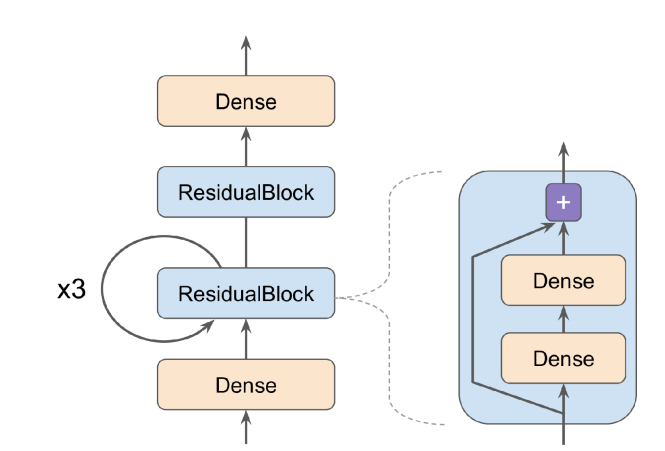

So this in this model, the input goes through a Dense layer,and then goes through a ResidualBlock 3 times. The data then goes through another ResidualBlock before reaching the output Dense Layer. The Residual blocks are made up of two Dense Layers and then the inputs are concatenated with the output of the second Dense Layer.

**To Create this model we will:**

1. Create a Custom ResidualBlock Layer

2. Create the Custom Residual Model.

Lets code

In [ ]:
# Residual Block Layer

class ResidualBlock(keras.layers.Layer):
    def __init__(self, n_layers, n_neurons,**kwargs):
        super().__init__(**kwargs)
        # Create the hidden Dense layers in the residual block by looping through the specified number of layers.
        self.hidden = [keras.layers.Dense(n_neurons, activation="elu", kernel_initializer="he_normal") for _ in range(n_layers)]
    
    def call(self, inputs):
        #This method will take inputs as an parameter.
        Z = inputs
        for layer in self.hidden:
            # Here recall that the inputsgo through a Dense Layer. Then the output of that dense layer will be input to the following dense layer, and so on.
            Z = layer(Z)
        return Z + inputs #Concatenate the inputs and the output of last Dense Layer

In [ ]:
# Creating the ResidualRegressor model

class ResidualRegressorModel(keras.Model):
    def __init__(self, output_dim, **kwargs):
        super().__init__(**kwargs)
        # Create the layers and variables in this method
        self.dense1 = keras.layers.Dense(30,activation="elu", kernel_initializer="he_normal")
        self.residual1 = ResidualBlock(2,30)
        self.residual2 = ResidualBlock(2,30)
        self.out = keras.layers.Dense(output_dim)
    
    def call(self, inputs):
        Z = self.dense1(inputs)
        for _ in range(3):
            Z = residual1(Z)
        resblock2 = self.residual2(Z)
        output = self.out(resblock2)
        return output
        

This model can now be used like any other model, meaning you can call the `compile()`, `fit()`, `evaluate()` and `predict()` methods on it. The model can also be saved using the `save()` method, and then load it using `keras.models.load_model()` function. RECALL: implement the `get_config()` method as previously done in both ResidualBlock class and ResidualRegressor class. Or you can save and load the model using the `save_weights()` and `get_weights()` methods

I want to try and create the WideNDeep model architecture using  Subclassing API. This is just to make sure that the method of doing this is reinforced.

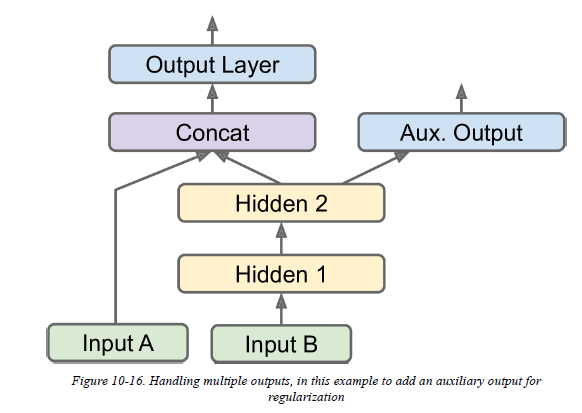

In [ ]:
class WideNDeep(keras.Model):
    def __init__(self, units, activation, **kwargs):
        super().__init__(**kwargs)
        self.units = units
        self.activation = keras.activations.get(activation)
        self.hidden1 = keras.layers.Dense(self.units, self.activation, kernel_initializer = "he_normal")
        self.hidden1 = keras.layers.Dense(self.units, self.activation, kernel_initializer = "he_normal")
        self.aux_out = keras.layers.Dense(1)
        self.main_out = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        # Main Path
        hidden1 = self.hidden1(input_A)
        hidden2 = self.hidden2(hidden1)
        # WidePath
        concat = keras.layers.Concatenate([input_B, hidden2])
        #Outputs
        aux_output = self.aux_out(hidden2)
        main_output = self.main_out(concat)
        
        return main_output, aux_output

The Model class is a subclass of the Layer class, so models can be defined
and used exactly like layers. But a model has some extra functionalities,
including of course its `compile()`, `fit()`, `evaluate()`, and `predict()`
methods (and a few variants), plus the `get_layers()` method (which can
return any of the model’s layers by name or by index) and the `save()`
method (and support for `keras.models.load_model()` and
`keras.models.clone_model()`).

With that, you can naturally and concisely build almost any model that you
find in a paper, using the Sequential API, the Functional API, the
Subclassing API, or even a mix of these. “Almost” any model? Yes, there
are still a few things that we need to look at: first, how to define losses or
metrics based on model internals, and second, how to build a custom
training loop.


# Exercises


**1. How would you describe TensorFlow in a short sentence? What are
its main features? Can you name other popular Deep Learning
libraries?**

Tensorflow is a numerical computation library that can be used for large scale ML. Its main features include the following:

1. It can be used just like Numpy, just  that it has GPU support
2. It can run on different environements
3. Supports distributed computing

Other popular Deep Learning Libraries include PyTorch, Theano and Keras
Note: MXNet, Microsoft Cognitive Toolkit,
Theano, Caffe2, and Chainer

**2.Is TensorFlow a drop-in replacement for NumPy? What are the
main differences between the two?**

No. The main difference between Numpy and TF is the following

a. TF has GPU support

b. TF is used for large-scale Machine Learning

c. TF used 32-bit precision whereas Numpy uses 64-bit precision.

d. Lastly, NumPy arrays are mutable, while TensorFlow tensors are not.(One can use tf.Variables if they want to change and update variables)

**3. Do you get the same result with tf.range(10) and
tf.constant(np.arange(10))?**

I will code it out and see the answer.


In [2]:
import tensorflow as tf
import numpy as np

print(tf.range(10))
print(tf.constant(np.arange(10)))

tf.Tensor([0 1 2 3 4 5 6 7 8 9], shape=(10,), dtype=int32)
tf.Tensor([0 1 2 3 4 5 6 7 8 9], shape=(10,), dtype=int32)


Yes, The result is the same. A 1 dimensional tensor with values ranging from 0 to 9.

**4. Can you name six other data structures available in TensorFlow,
beyond regular tensors?**



1. Sparse tensors (`tf.SparseTensor`)

2. ensor arrays (`tf.TensorArray`)

3. Ragged tensors (`tf.RaggedTensor`)

4. Sets(`tf.sets`)

5. String Tensors 

6. Queues

The string tensors and sets are actually
represented as regular tensors, but TensorFlow provides special
functions to manipulate them

**5. A custom loss function can be defined by writing a function or by
subclassing the keras.losses.Loss class. When would you use
each option**


When you want to define a custom loss function, in general you
can just implement it as a regular Python function. However, if
your custom loss function must support some hyperparameters (or
any other state), then you should subclass the keras.losses.Loss
class and implement the `__init__()` and `call()` methods. If you
want the loss function’s hyperparameters to be saved along with
the model, then you must also implement the `get_config()`
method.

**6. Similarly, a custom metric can be defined in a function or a
subclass of keras.metrics.Metric. When would you use each
option?**

My Answer:

The process of defining a custom metric is the same a custom loss function. In general one would create a function as the custom metric. However, if there are any hyparameters that you would like to have saved, then one can subclass the keras.metrics.Metric class and implement the `__init__()`, `update_state()`, `result()` and `get_config()` methods(If there are hyperparameters to be saved).


Textbook answer:

 Much like custom loss functions, most metrics can be defined as
regular Python functions. But if you want your custom metric to
support some hyperparameters (or any other state), then you should
subclass the keras.metrics.Metric class. Moreover, if
computing the metric over a whole epoch is not equivalent to
computing the mean metric over all batches in that epoch (e.g., as
for the precision and recall metrics), then you should subclass the
keras.metrics.Metric class and implement the __init__(),
update_state(), and result() methods to keep track of a
running metric during each epoch. You should also implement the
reset_states() method unless all it needs to do is reset all
variables to 0.0. If you want the state to be saved along with the
model, then you should implement the get_config() method as
well.

**7. When should you create a custom layer versus a custom model?**

My answer

You should create a custom layer when the model architecture has repeating sequence of layers. The repeating sequence of layers can be treated as a block of layers, which in turn will be the custom layer.

When you have a custom architecture where the you want control and information does not traverse the network in a sequential manner.

Textbook Answer

You should distinguish the internal components of your model (i.e.,
layers or reusable blocks of layers) from the model itself (i.e., the
object you will train). The former should subclass the
keras.layers.Layer class, while the latter should subclass the
keras.models.Model class
